# Car Price Prediction

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Preparation

In [5]:
df = copy.copy(car_price)

In [6]:
# df.drop(['car_ID'], axis=1, inplace=True)

In [7]:
#Converting car name as per given instructions
df["CarName"] = df["CarName"].apply(lambda s: s.split("-")[0])

In [8]:
df["CarName"] = df["CarName"].apply(lambda s: s.split(" ")[0])

In [9]:
#Creating dummy variable for column 'fueltype'
fuel = pd.get_dummies(df['fueltype'])

In [10]:
fuel = pd.get_dummies(df['fueltype'],drop_first=True)

In [11]:
df = pd.concat([fuel,df],axis=1)

In [12]:
#Only keeping dummmy variable and dropping original column
df.drop(['fueltype'],axis=1,inplace=True)

In [13]:
#Creating dummy variable for column 'aspiration'
asp = pd.get_dummies(df['aspiration'])

In [14]:
asp = pd.get_dummies(df['aspiration'],drop_first=True)

In [15]:
df.drop(['aspiration'], axis= 1, inplace= True)

In [16]:
df = pd.concat([asp,df],axis=1)

In [17]:
# Converting 'doornumber' entries from format 'str' to 'int'
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

In [18]:
# Converting 'cylindernumber' entries from format 'str' to 'int'
df['cylindernumber'] =df['cylindernumber'].map({'two': 2,'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [19]:
#Creating dummy variable for column 'carbody'
body = pd.get_dummies(df['carbody'],drop_first=True)

In [20]:
df= pd.concat([body,df],axis=1)

In [21]:
df.drop(['carbody'], axis= 1, inplace= True)

In [22]:
#Creating dummy variable for column 'drivewheel'
wheel = pd.get_dummies(df['drivewheel'],drop_first=True)

In [23]:
df= pd.concat([wheel,df],axis=1)

In [24]:
df.drop(['drivewheel'], axis= 1, inplace= True)

In [25]:
#Creating dummy variable for column 'enginetype'

etype = pd.get_dummies(df['enginetype'],drop_first=True)

In [26]:
df= pd.concat([etype,df],axis=1)

In [27]:
df.drop(['enginetype'], axis=1, inplace= True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 35 columns):
dohcv               205 non-null uint8
l                   205 non-null uint8
ohc                 205 non-null uint8
ohcf                205 non-null uint8
ohcv                205 non-null uint8
rotor               205 non-null uint8
fwd                 205 non-null uint8
rwd                 205 non-null uint8
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               205 non-null uint8
wagon               205 non-null uint8
turbo               205 non-null uint8
gas                 205 non-null uint8
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
doornumber          205 non-null int64
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-n

CarName

In [29]:
#Creating dummy variable for column 'CarName'

name = pd.get_dummies(df['CarName'],drop_first= True)

In [30]:
df = pd.concat([name,df], axis =1)

In [31]:
df.drop(['CarName'], axis=1, inplace= True)

In [32]:
#Creating dummy variable for column 'fuelsystem'

system = pd.get_dummies(df['fuelsystem'], drop_first= True)

In [33]:
df= pd.concat([system,df],axis=1)

In [34]:
df.drop(['fuelsystem'],axis=1, inplace=True)

enginelocation

In [35]:
location = pd.get_dummies(df['enginelocation'],drop_first= True)

In [36]:
df= pd.concat([location,df],axis=1)

In [37]:
df.drop(['enginelocation'],axis=1, inplace= True)

# EDA
## spelling errors in CarNames
#### There are instances where name of same car companies spelled diifferently. E.g toyota and toyouta, porcshce ans porsche, vokswagen and volkswagen.

In [38]:
#Let's combine these columns pairwise

In [39]:
df['toyota'] = df['toyota'] + df['toyouta']

In [40]:
df.drop('toyouta', axis=1, inplace= True)

In [41]:
df['toyota'].value_counts()

0    173
1     32
Name: toyota, dtype: int64

In [42]:
df['porsche'] = df['porsche'] + df['porcshce']

In [43]:
df.drop('porcshce', axis=1, inplace= True)

In [44]:
df['porsche'].value_counts()

0    200
1      5
Name: porsche, dtype: int64

In [45]:
df['volkswagen'] = df['vokswagen'] + df['volkswagen']

In [46]:
df.drop('vokswagen', axis=1, inplace= True)

In [47]:
df['volkswagen'].value_counts()

0    195
1     10
Name: volkswagen, dtype: int64

In [48]:
df['mazda'] = df['mazda'] + df['maxda']

In [49]:
df.drop('maxda', axis=1, inplace= True)

In [50]:
df['mazda'].value_counts()

0    188
1     17
Name: mazda, dtype: int64

# Rescaling the features by normalization

In [51]:
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

df= df.apply(normalize)

In [52]:
df.head()

,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa,audi,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,-0.038049,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,-0.038049,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,0.985366,-0.034146,...,0.161951,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,-0.014634,0.965854,...,-0.038049,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,-0.014634,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878,-0.014634,0.965854,...,0.061951,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


In [53]:
#To find highly correlated indpendent variables we are creating another dataframe which won't consist of dependent variable
cf = copy.copy(df)
cf.drop('price', axis= 1, inplace=True)

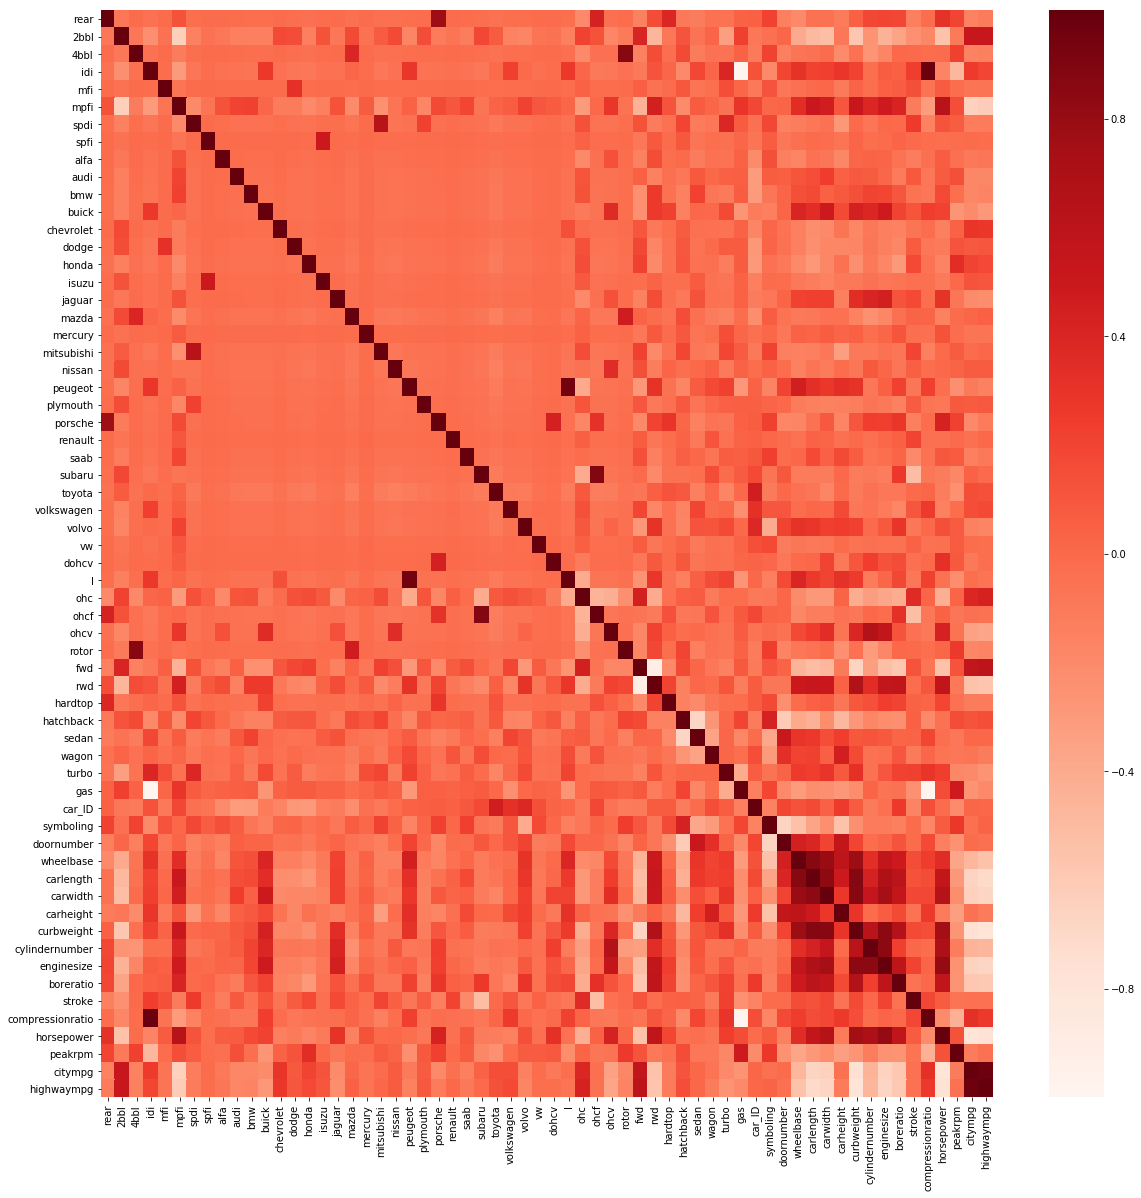

In [54]:
plt.figure(figsize=(20,20))
# heatmap with a color map of choice
cf_corr= cf.corr()
sns.heatmap(cf_corr, cmap="Reds")
plt.show()


In [55]:
cf_corr.style.background_gradient().set_precision(2)

In [56]:
# paiwise scatter plot

# plt.figure(figsize=(20, 10))
# sns.pairplot(cf)
# plt.show()

### Removing columns with high correlation value

In [57]:
#dropping columns which have vey high correlation coefficient (columns with coefficients in between 0.984356 and 0.801456)
df.drop(['compressionratio','citympg','l','ohcf','fwd','carlength','curbweight','4bbl','cylindernumber','car_ID'],axis=1,inplace=True)

### Model 1

In [58]:
#Dependent variable
X = df.loc[:,'2bbl':'highwaympg']

#Independent variable
y = df.loc[:,'price']

In [59]:
# Splitting data into training and testing subsets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

/home/tejas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
# Defining VVIF function to check for multicollinearity afterwards
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()        #Creating LinearRegression object
rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False False  True  True  True  True False False
 False False  True False False False False False False  True False  True
 False False False  True False  True False False  True False False False
 False False False False False False  True  True False  True False False
 False False False]
[22 27 37 23 25 38  1  1  1  1 12 28 21 11  1 13 39 26 18 16 29  1 35  1 10
 15 19  1 14  1 33 17  1 32  7  3  4  5  9 24 36 30  1  1 20  1  2 34 31  6
  8]


In [63]:
col = X_train.columns[rfe.support_]             #Creating list of columns from rfe.support_

In [64]:
X_train_rfe = X_train[col]             #Creating a dataframe to train the model from column selected through rfe.

In [65]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/home/tejas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [66]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           7.09e-66
Time:                        22:38:34   Log-Likelihood:                 217.49
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     129   BIC:                            -365.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.005      0.106      0.9

In [68]:
#Creating a dataframe as an input for vif_cal function
kf = df[col]
kf = kf.join(df['price'])

In [69]:
col

Index(['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo',
       'dohcv', 'rotor', 'wheelbase', 'carwidth', 'enginesize'],
      dtype='object')

In [70]:
vif_cal(input_data=kf,dependent_col="price" )

,Var,Vif
11,carwidth,6.53
12,enginesize,4.63
10,wheelbase,3.96
3,buick,1.81
4,jaguar,1.65
5,porsche,1.64
8,dohcv,1.40
1,audi,1.28
7,volvo,1.24
2,bmw,1.23


##### This model is stable but there are  variables 'dohcv' and 'wheelbase' which have very high p-value. In next model we will drop 'dohcv'

### Model 2

In [71]:
# New set of features after dropping the ones with high p-value
col2 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'wheelbase', 'carwidth', 'enginesize']

In [72]:
X_train2 = X_train[col2]

In [73]:
X_train2 = sm.add_constant(X_train2)

In [74]:
lm2 = sm.OLS(y_train,X_train2).fit()

In [75]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           1.25e-66
Time:                        22:38:35   Log-Likelihood:                 216.67
No. Observations:                 143   AIC:                            -407.3
Df Residuals:                     130   BIC:                            -368.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.005      0.062      0.9

In [76]:
kf2 = df[col2]
kf2 = kf2.join(df['price'])

In [77]:
vif_cal(input_data=kf2,dependent_col="price" )

,Var,Vif
10,carwidth,5.85
11,enginesize,4.49
9,wheelbase,3.87
3,buick,1.80
4,jaguar,1.65
5,porsche,1.41
1,audi,1.25
2,bmw,1.23
7,volvo,1.23
8,rotor,1.15


##### Model 2 has all the p values within range except for 'wheelbase'. In next model we will drop variable 'wheelbase'

### Model 3

In [78]:
col3 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'carwidth', 'enginesize']

In [79]:
X_train3 = X_train[col3]

In [80]:
X_train3 = sm.add_constant(X_train3)

In [81]:
lm3 = sm.OLS(y_train,X_train3).fit()

In [82]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           4.24e-67
Time:                        22:38:36   Log-Likelihood:                 215.10
No. Observations:                 143   AIC:                            -406.2
Df Residuals:                     131   BIC:                            -370.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.48e-05      0.005      0.005      0.9

In [83]:
kf3 = df[col3]
kf3 = kf3.join(df['price'])

In [84]:
vif_cal(input_data=kf3,dependent_col="price" )

,Var,Vif
10,enginesize,4.48
9,carwidth,3.30
3,buick,1.79
4,jaguar,1.64
1,audi,1.22
5,porsche,1.21
2,bmw,1.18
7,volvo,1.18
8,rotor,1.12
0,alfa,1.04


##### Model 3 has all the p values within range. But the variable 'enginesize' has high vif

### Model 4

In [85]:
col4 = ['alfa', 'audi', 'bmw', 'buick', 'jaguar', 'porsche', 'saab', 'volvo', 'rotor', 'carwidth']

In [86]:
X_train4 = X_train[col4]

In [87]:
X_train4 = sm.add_constant(X_train4)

In [88]:
lm4 = sm.OLS(y_train,X_train4).fit()

In [89]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sun, 16 Sep 2018   Prob (F-statistic):           4.00e-57
Time:                        22:38:37   Log-Likelihood:                 187.28
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     132   BIC:                            -320.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.006     -0.629      0.5

In [90]:
kf4 = df[col4]
kf4 = kf4.join(df['price'])

In [91]:
vif_cal(input_data=kf4,dependent_col="price" )

,Var,Vif
9,carwidth,1.94
3,buick,1.56
1,audi,1.18
7,volvo,1.18
4,jaguar,1.14
2,bmw,1.04
5,porsche,1.04
6,saab,1.03
0,alfa,1.01
8,rotor,1.01


### Here we have all the p-values and VIF values within expected range

## Predictions on model 4

In [92]:
X_test4 = X_test[col4]               #Creating a dataframe to test the model from column selected through rfe

# Adding a constant variable 
X_test4 = sm.add_constant(X_test4, has_constant='add')
# Making predictions
y_pred4 = lm4.predict(X_test4)

## Evaluation of model 4

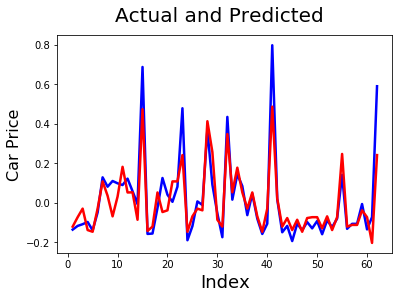

In [93]:
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred4, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label
plt.show()

In [94]:
y_pred4 =y_pred4.rename(columns={0:'price'})

Text(0,0.5,'ytest-ypred')

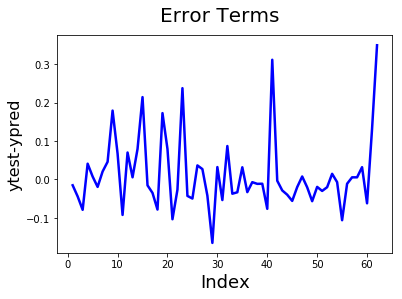

In [95]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred4, color="blue", linewidth=2.5, linestyle="-")
# plt.scatter(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

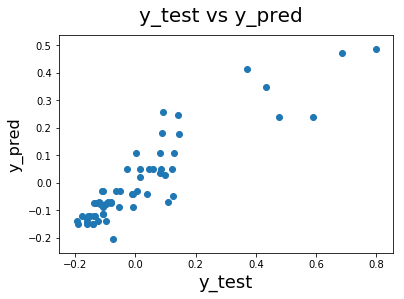

In [96]:
fig = plt.figure()
plt.scatter(y_test,y_pred4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                        # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

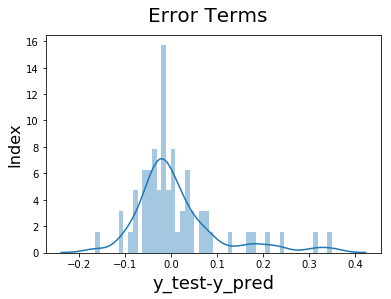

In [97]:
fig = plt.figure()
sns.distplot((y_test-y_pred4),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label